## Part II - Prosper Loans dataset exploration
## by Paulina Romanczuk

# Investigation Overview

## Prosper has a rather appropriate system of assigning credit risk, and this risk is being compensated via higher interest rates charged on loans 
## The longer the term and the smaller the value of loans, the higher interest rate it has applied
## There isn't one factor that single-handedly affects Borrower APR's rate


# Dataset Overview

## This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from markupsafe import Markup

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
copy_df = pd.read_csv("wrangled_data.csv")

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Relationship between credit risk and  loan status


Prosper has a rather appropriate system of assigning credit risk - the highest number of defaulted customers had already assigned "High Risk" category. 40% of defaulted customers had already assigned highest risk categories

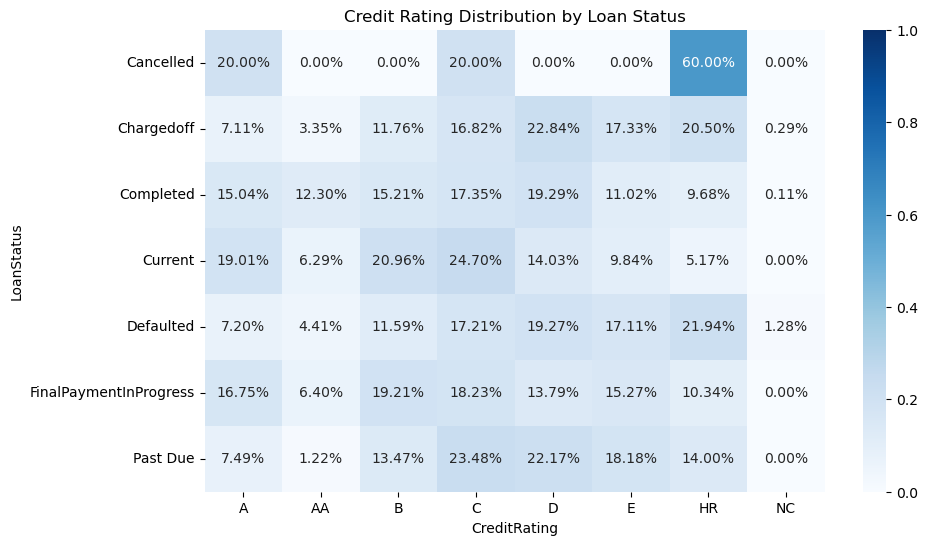

In [3]:

#define function for heatmap

def create_heatmap(data, x_column, y_column, title, vmin=0, vmax=1):
    # Create a cross-tabulation
    cross_tab = pd.crosstab(data[x_column], data[y_column], normalize='index')

    # Create a heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='.2%', vmin=vmin, vmax=vmax)
    plt.title(title)
    plt.xlabel(y_column)
    plt.ylabel(x_column)
    plt.show()

create_heatmap(copy_df, 'LoanStatus', 'CreditRating', 'Credit Rating Distribution by Loan Status')

## Prosper is compensating this higher risk with higher rates given to customers with E and HR ratings

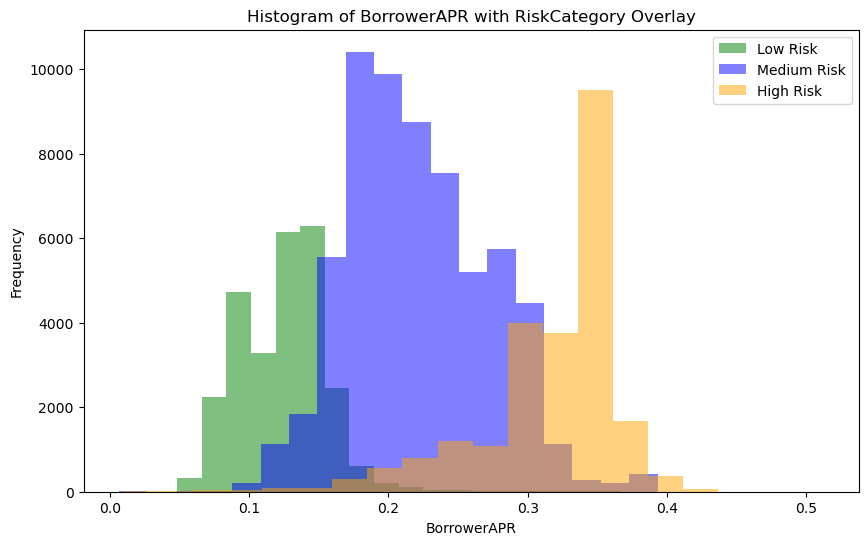

In [4]:
colors = {'Low Risk': 'green', 'Medium Risk': 'blue', 'High Risk': 'orange'}

# Create a histogram with colored bars
plt.figure(figsize=(10, 6))
for risk_category, color in colors.items():
    plt.hist(copy_df[copy_df['RiskCategory'] == risk_category]['BorrowerAPR'], bins=20, alpha=0.5, label=risk_category, color=color)

plt.title('Histogram of BorrowerAPR with RiskCategory Overlay')
plt.xlabel('BorrowerAPR')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## How loan amount, term and rate are connected?
The longer the term and the smaller the value of loans, the higher interest rate it has applied - the highest amounts tend to rather sit within longer terms and have less than 0.2 APR rate


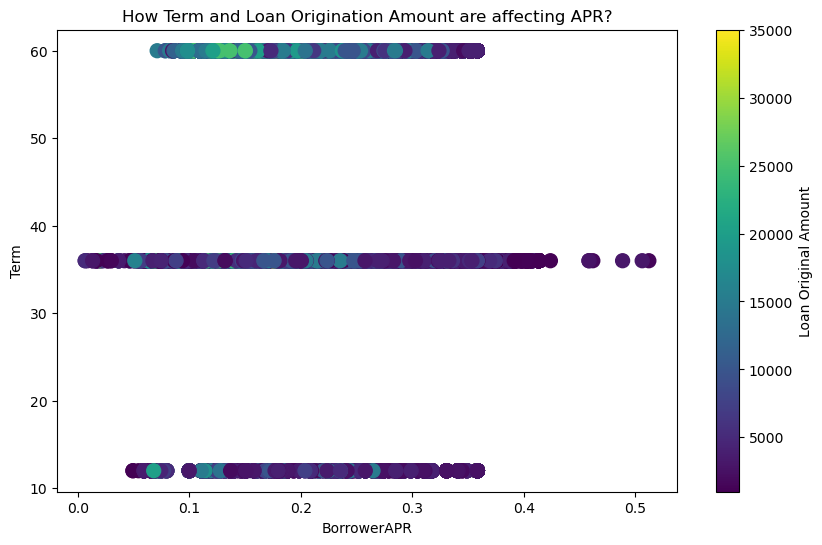

In [5]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(copy_df['BorrowerAPR'], copy_df['Term'], c=copy_df['LoanOriginalAmount'], s=100)
plt.colorbar(scatter, label='Loan Original Amount')
plt.title('How Term and Loan Origination Amount are affecting APR?')
plt.xlabel('BorrowerAPR')
plt.ylabel('Term')
plt.show()

## What factors are influencing Borrower Annual Percentage Rate most?
There is a moderate negative correlation (meaning as this value tends to decrease, then BorrowerAPR tends to increase) between BorrowerAPR and lower bound of credit score, LoanOriginalAmount and AvailableBankcardCredit

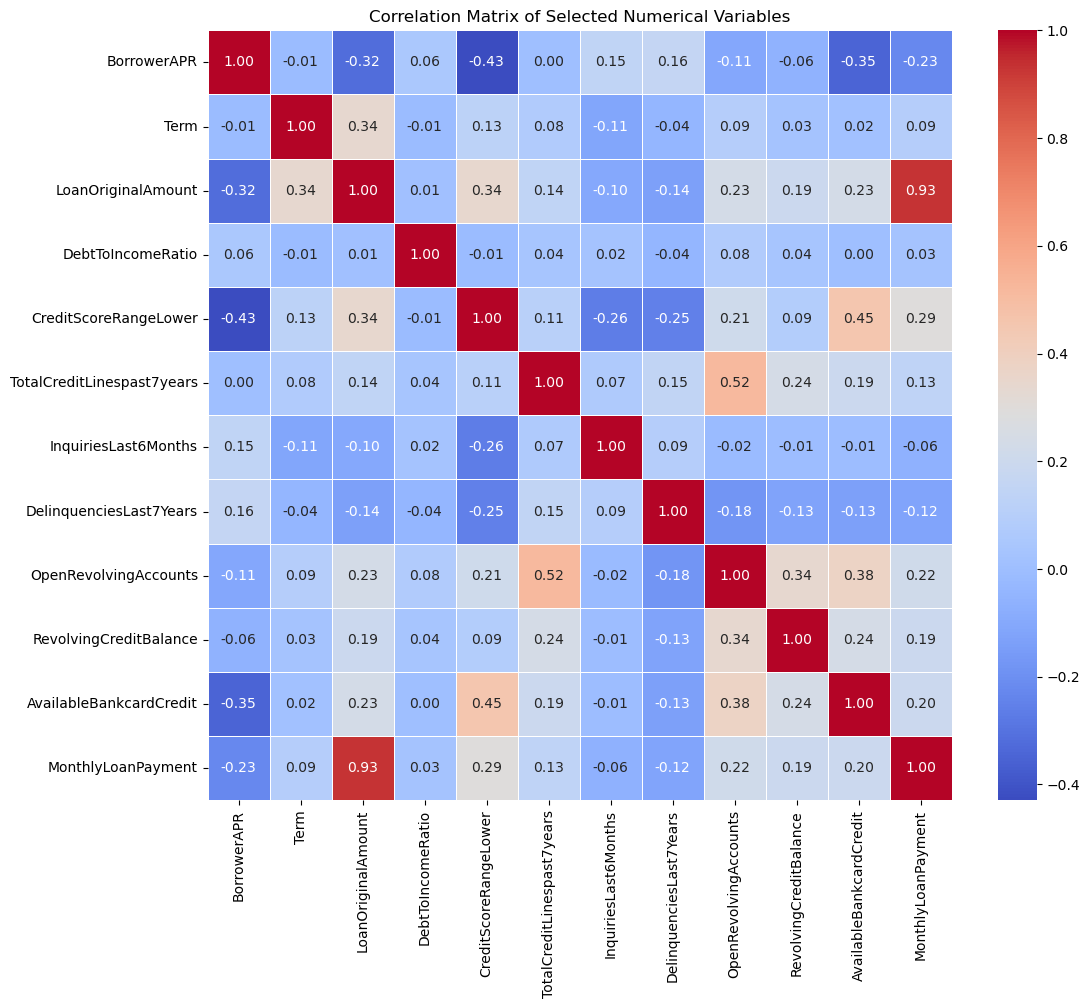

In [6]:
numerical_variables = [
    'BorrowerAPR',
    'Term',
    'LoanOriginalAmount',
    'DebtToIncomeRatio',
    'CreditScoreRangeLower',
    'TotalCreditLinespast7years',
    'InquiriesLast6Months',
    'DelinquenciesLast7Years',
    'OpenRevolvingAccounts',
    'RevolvingCreditBalance',
    'AvailableBankcardCredit',
    'MonthlyLoanPayment',
]
# Create a correlation matrix
correlation_matrix_w = copy_df[numerical_variables].corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_w, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Selected Numerical Variables')
plt.show()

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [7]:
!jupyter-nbconvert Part_II_slide_deck_template-checkpoint.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template-checkpoint.ipynb to slides
Traceback (most recent call last):
  File "C:\Users\pauli\anaconda3\envs\udacity_project_2\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\pauli\anaconda3\envs\udacity_project_2\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\pauli\anaconda3\envs\udacity_project_2\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\pauli\anaconda3\envs\udacity_project_2\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\pauli\anaconda3\envs\udacity_project_2\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users\pauli\anaconda3\envs\udacity_project_2\lib\si